# Imports

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import csv


from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Load Images

#### Load Train Images

In [2]:
#this works as long as it is inside code/
train_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/train/"
test_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/test/"
images_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/"

classes = os.listdir(train_path)

images = []
labels = []

#Read csv file
with open(images_path + 'Train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    headers = next(csv_reader, None)

    for row in csv_reader:
        # Se quiser limitar a quantidade de imagens
        # if np.random.rand(1) < 0.9:
        #     continue

        img = Image.open(images_path + row[-1])

        #Crop image (This is given in the file, not calculated)
        img = img.crop((int(row[2]), int(row[3]), int(row[4]), int(row[5])))

        #needs to resize
        img = img.resize((30, 30))

        #Convert image to grayscale
        img = img.convert('L')

        #Convert image to numpy array (Feature Extraction)
        img = np.array(img)#.flatten()
        #img.reshape(img.shape[0], 1)

        # Reshape image to work with ZeroPadding
        img = img.reshape(img.shape[0], img.shape[1], 1)

        #Append image to list
        images.append(img)

        #Append label to list
        labels.append(np.uint8(row[6]))

X = np.array(images)
y = np.array(labels)
y = y.reshape(y.shape[0], 1)

#Split dataset, mantaining the proportion of samples in each class
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=68, stratify=y)


#### Load Test Images

In [3]:
test_images = []
test_labels = []

with open(images_path + 'Test.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers_test = next(csv_reader, None)  # skip the headers
    for row in csv_reader:

        img = Image.open(images_path + row[-1])

        #Crop image (This is given in the file, not calculated)
        img = img.crop((int(row[2]), int(row[3]), int(row[4]), int(row[5])))

        #needs to resize
        img = img.resize((30, 30))

        #Convert image to grayscale
        img = img.convert('L')

        #Convert image to numpy array (Feature Extraction)
        img = np.array(img)#.flatten()
        # img.reshape(img.shape[0], 1)
        
        # Reshape image to work with ZeroPadding
        img = img.reshape(img.shape[0], img.shape[1], 1)

        #Append image to list
        test_images.append(img)

        #Append label to list
        test_labels.append(np.uint8(row[6]))

X_test = np.array(test_images)
y_test = np.array(test_labels)

#### Normalize Data

In [4]:
# Normalize train, validation and test
X_train = X_train/255.
X_val = X_val/255.
X_test = X_test/255.

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, len(classes))
y_val = to_categorical(y_val, len(classes))
y_test = to_categorical(y_test, len(classes))

#What is the shape of X_train, X_test, Y_train, Y_test
print("X_train shape: " + str(X_train.shape))
print("X_val shape: " + str(X_val.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_train shape: " + str(y_train.shape))
print("Y_val shape: " + str(y_val.shape))
print("Y_test shape: " + str(y_test.shape))
    
# How many training and test examples ?
print("Number of training examples: " + str(X_train.shape[0]))
print("Number of validation examples: " + str(X_val.shape[0]))
print("Number of test examples: " + str(X_test.shape[0]))

X_train shape: (31367, 30, 30, 1)
X_val shape: (7842, 30, 30, 1)
X_test shape: (12630, 30, 30, 1)
Y_train shape: (31367, 43)
Y_val shape: (7842, 43)
Y_test shape: (12630, 43)
Number of training examples: 31367
Number of validation examples: 7842
Number of test examples: 12630


#### Labels

In [5]:
# Labels Translation
classes_translation = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Analyse Dataset

#### Check class distribution in test dataset

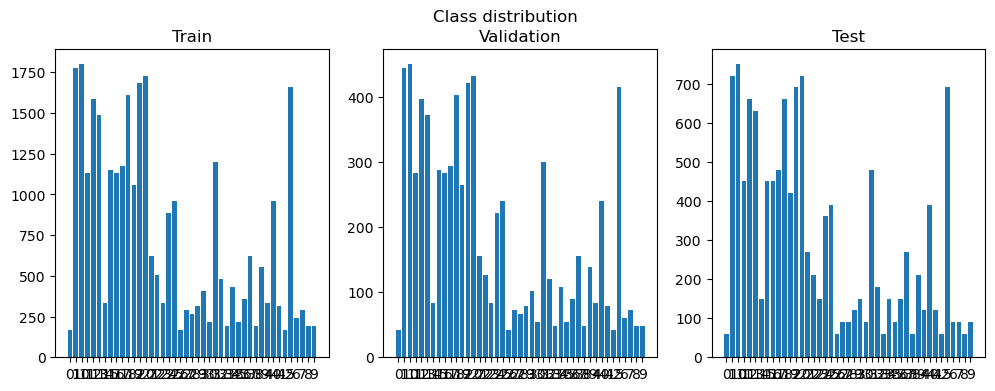

In [6]:
# Check class distribution in test, train and validation
n_samples_train = sum(y_train==1)
n_samples_val = sum(y_val==1)
n_samples_test = sum(y_test==1)


fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].bar(classes, n_samples_train)
ax[0].set_title('Train')
ax[1].bar(classes, n_samples_val)
ax[1].set_title('Validation')
ax[2].bar(classes, n_samples_test)
ax[2].set_title('Test')
fig.suptitle('Class distribution')
plt.show()


# Models

#### Imports

In [7]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

#### CNN with 1 convolutional layer

In [8]:
def CNN1(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> BN -> RELU -> MAXP
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)

    X = MaxPooling2D(pool_size=(2, 2), name='max_pool')(X)

    # Dropout offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.
    X = Dropout(0.2)(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = Dropout(0.3)(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [9]:
# Create the model
cnn1 = CNN1(X_train.shape[1:])

# Compile model
cnn1.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# CNN model summary

cnn1.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 36, 36, 1)        0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        320       
                                                                 
 max_pool (MaxPooling2D)     (None, 17, 17, 32)        0         
                                                                 
 dropout (Dropout)           (None, 17, 17, 32)        0         
                                                                 
 flatten (Flatten)           (None, 9248)              0         
                                                              

In [11]:
#Train the model
model1 = cnn1.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/20
981/981 [==============================] - 55s 54ms/step - loss: 1.3819 - accuracy: 0.6302 - val_loss: 0.4625 - val_accuracy: 0.8903
Epoch 2/20
981/981 [==============================] - 48s 49ms/step - loss: 0.4345 - accuracy: 0.8802 - val_loss: 0.2394 - val_accuracy: 0.9457
Epoch 3/20
981/981 [==============================] - 59s 61ms/step - loss: 0.2923 - accuracy: 0.9193 - val_loss: 0.1852 - val_accuracy: 0.9551
Epoch 4/20
981/981 [==============================] - 57s 58ms/step - loss: 0.2285 - accuracy: 0.9343 - val_loss: 0.1453 - val_accuracy: 0.9658
Epoch 5/20
981/981 [==============================] - 57s 58ms/step - loss: 0.1929 - accuracy: 0.9454 - val_loss: 0.1318 - val_accuracy: 0.9695
Epoch 6/20
981/981 [==============================] - 51s 52ms/step - loss: 0.1725 - accuracy: 0.9487 - val_loss: 0.1108 - val_accuracy: 0.9765
Epoch 7/20
981/981 [==============================] - 48s 49ms/step - loss: 0.1534 - accuracy: 0.9554 - val_loss: 0.1079 - val_accuracy:

##### Plot Model Evolution

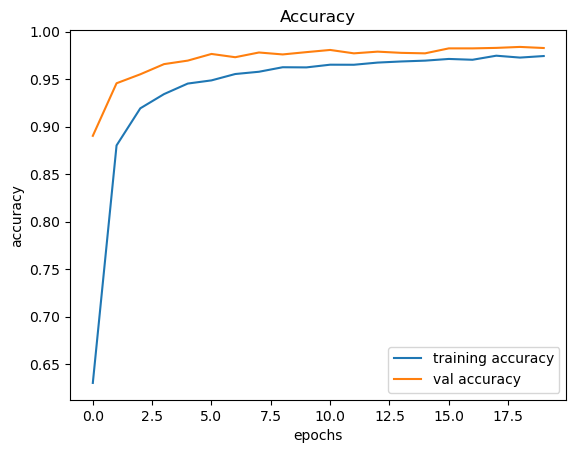

In [12]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(model1.history['accuracy'], label='training accuracy')
plt.plot(model1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

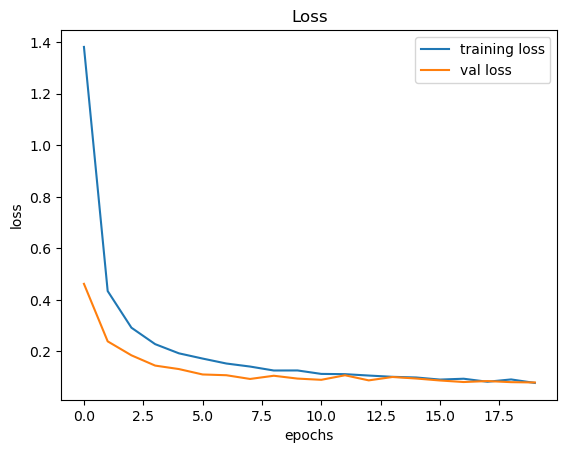

In [13]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(model1.history['loss'], label='training loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

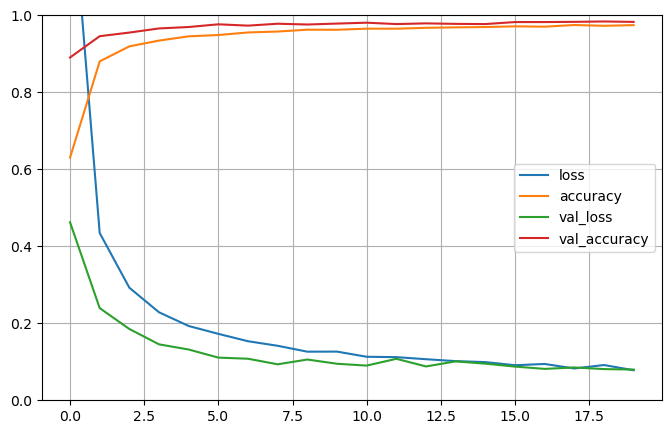

In [14]:
pd.DataFrame(model1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

395/395 [==============================] - 5s 11ms/step


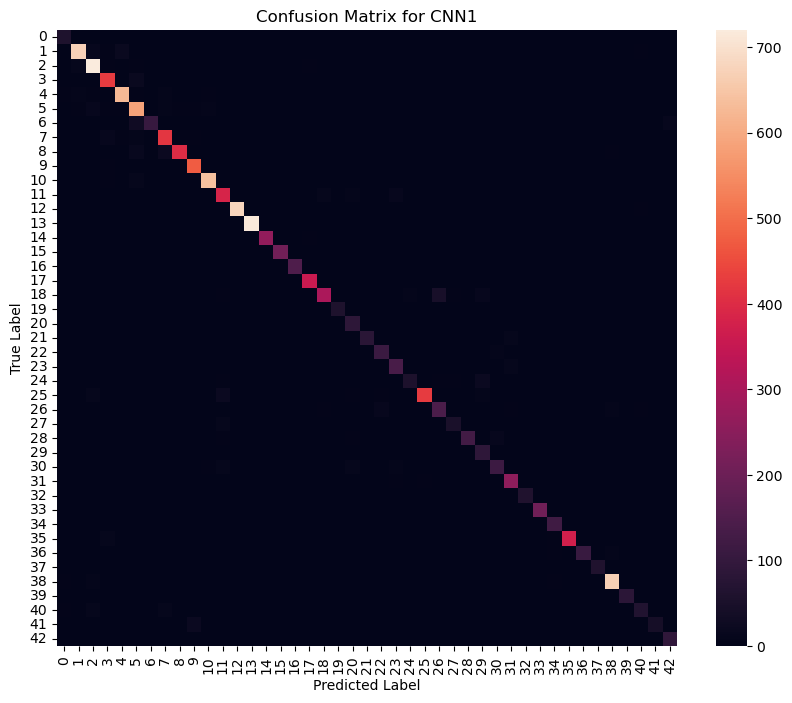

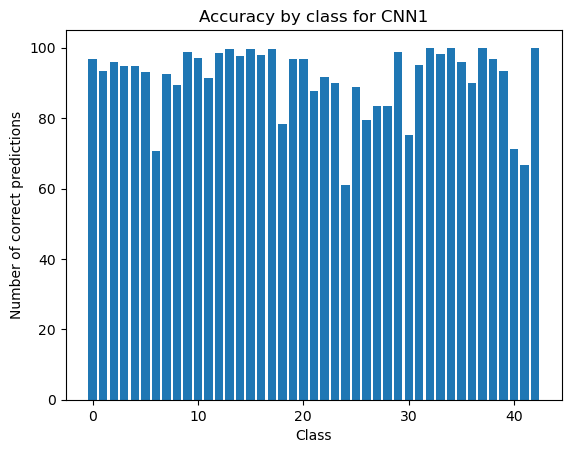

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        60
           1       0.96      0.93      0.95       720
           2       0.93      0.96      0.94       750
           3       0.91      0.95      0.93       450
           4       0.95      0.95      0.95       660
           5       0.86      0.93      0.90       630
           6       1.00      0.71      0.83       150
           7       0.89      0.93      0.91       450
           8       0.97      0.89      0.93       450
           9       0.94      0.99      0.96       480
          10       0.97      0.97      0.97       660
          11       0.87      0.91      0.89       420
          12       0.99      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       0.99      0.98      0.98       270
          15       1.00      1.00      1.00       210
          16       0.99      0.98      0.98       150
          17       0.97    

In [15]:
# Model1 confusion matrix
y_pred = cnn1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_true, y_pred_classes)


# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, fmt='d')
plt.title('Confusion Matrix for CNN1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy by class
diagonal = np.diag(cm)
# Use the percentage of correct predictions
diagonal = diagonal/cm.sum(axis=1)*100
plt.bar(range(len(diagonal)), diagonal)
plt.xlabel('Class')
plt.ylabel('Number of correct predictions')
plt.title('Accuracy by class for CNN1')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

In [16]:
# Sum the quantity of correct predictions
correct_predictinons = sum(np.diag(cm))
# Sum the quantity of incorrect predictions
total_predictions = sum(sum(cm))

# Accuracy
accuracy = correct_predictinons/total_predictions

# Save wrong predictions into a variable for further analysis
wrong_predictions = np.where(y_pred_classes != y_true)[0]



##### Test trained model

In [17]:
score_1 = cnn1.evaluate(X_test, y_test, verbose=0)

print('Test Score:', score_1[0])
print('Test Accuracy:', score_1[1])

Test Score: 0.36569079756736755
Test Accuracy: 0.9335708618164062


In [18]:
# Save the model
cnn1.save('trained_models/grayscale/cnn1_' + str(int(score_1[1]*100)) + '.h5')

#### CNN with 3 Convolutional Layer

In [19]:
def CNN3(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    # BLOCK 3: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.4)(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = Dropout(0.3)(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [20]:
# Create the model
cnn3 = CNN3(X_train.shape[1:])

# Compile model
cnn3.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# CNN model summary

cnn3.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 36, 36, 1)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 17, 17, 32)        0         
                                                                 
 conv1 (Conv2D)              (None, 15, 15, 64)        18496  

In [22]:
#Train the model
model3 = cnn3.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/20
981/981 [==============================] - 48s 46ms/step - loss: 1.9426 - accuracy: 0.4589 - val_loss: 0.3743 - val_accuracy: 0.9146
Epoch 2/20
981/981 [==============================] - 50s 51ms/step - loss: 0.4513 - accuracy: 0.8625 - val_loss: 0.1439 - val_accuracy: 0.9631
Epoch 3/20
981/981 [==============================] - 48s 49ms/step - loss: 0.2614 - accuracy: 0.9184 - val_loss: 0.0762 - val_accuracy: 0.9802
Epoch 4/20
981/981 [==============================] - 45s 46ms/step - loss: 0.1919 - accuracy: 0.9423 - val_loss: 0.0611 - val_accuracy: 0.9855
Epoch 5/20
981/981 [==============================] - 46s 47ms/step - loss: 0.1484 - accuracy: 0.9543 - val_loss: 0.0443 - val_accuracy: 0.9903
Epoch 6/20
981/981 [==============================] - 61s 62ms/step - loss: 0.1300 - accuracy: 0.9601 - val_loss: 0.0357 - val_accuracy: 0.9915
Epoch 7/20
981/981 [==============================] - 53s 54ms/step - loss: 0.1140 - accuracy: 0.9653 - val_loss: 0.0342 - val_accuracy:

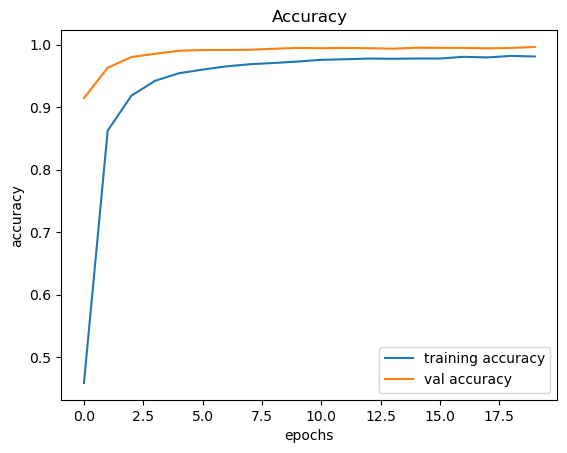

In [23]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(model3.history['accuracy'], label='training accuracy')
plt.plot(model3.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

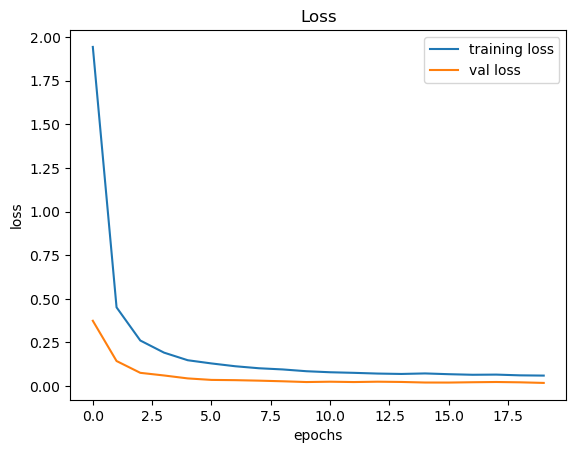

In [24]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(model3.history['loss'], label='training loss')
plt.plot(model3.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

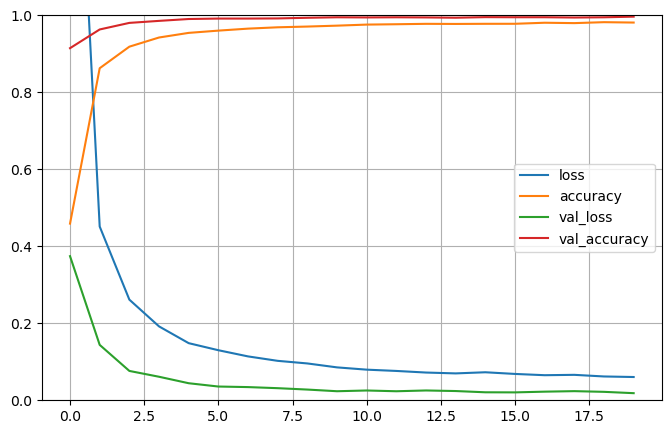

In [25]:
pd.DataFrame(model3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Test trained model

In [26]:
score_3 = cnn3.evaluate(X_test, y_test, verbose=0)

print('Test Score:', score_3[0])
print('Test Accuracy:', score_3[1])

Test Score: 0.08997909724712372
Test Accuracy: 0.9778305888175964


In [27]:
# Save the model
cnn3.save('trained_models/grayscale/cnn3_' + str(int(score_3[1]*100)) + '.h5')

395/395 [==============================] - 6s 14ms/step


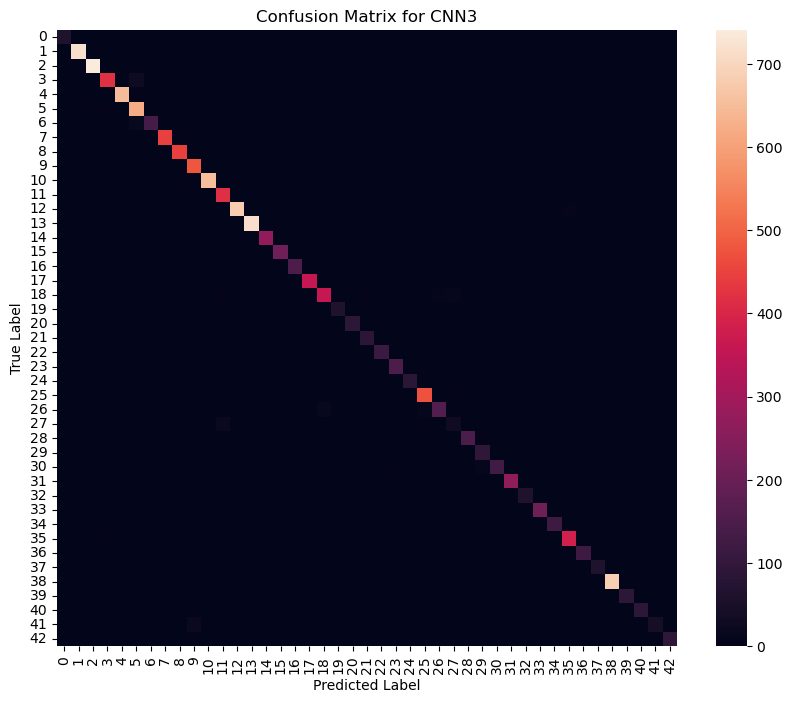

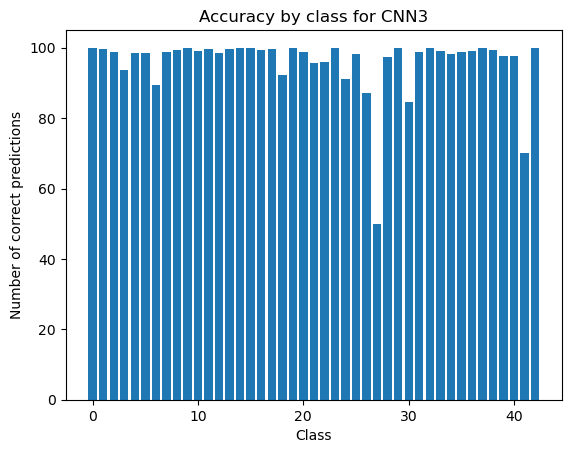

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.99      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.98      0.94      0.96       450
           4       1.00      0.98      0.99       660
           5       0.93      0.99      0.96       630
           6       1.00      0.89      0.94       150
           7       1.00      0.99      0.99       450
           8       0.98      0.99      0.98       450
           9       0.96      1.00      0.98       480
          10       1.00      0.99      0.99       660
          11       0.93      1.00      0.96       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [28]:
# Model3 confusion matrix
y_pred = cnn3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm_3 = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_3, annot=False, fmt='d')
plt.title('Confusion Matrix for CNN3')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy by class
diagonal = np.diag(cm_3)
# Use the percentage of correct predictions
diagonal = np.diag(cm_3)/cm_3.sum(axis=1)*100
plt.bar(range(len(diagonal)), diagonal)
plt.xlabel('Class')
plt.ylabel('Number of correct predictions')
plt.title('Accuracy by class for CNN3')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

In [29]:
# Sum the quantity of correct predictions
correct_predictinons = sum(np.diag(cm_3))
# Sum the quantity of incorrect predictions
total_predictions = sum(sum(cm_3))

# Accuracy
accuracy = correct_predictinons/total_predictions

# Save wrong predictions into a variable for further analysis
wrong_predictions_3 = np.where(y_pred_classes != y_true)[0]



##### Time to predict

In [30]:
x_sample = X_test[0].reshape(1, X_test[0].shape[0], X_test[0].shape[0], X_test[1].shape[2])
y_sample = y_test[0]

x_sample.shape

#Start timer
import time
start = time.time()
sample_pred = cnn3.predict(x_sample)
end = time.time()

# Check prediction
print("Predicted class:", np.argmax(sample_pred))
print("Actual class:", np.argmax(y_sample))

# Print time elapsed
print("Time to predict:", end - start, "seconds")


1/1 [==============================] - 0s 55ms/step
Predicted class: 16
Actual class: 16
Time to predict: 0.15474534034729004 seconds


#### CNN with 3 Convolutional Layer using BatchNormalization

In [31]:
def CNN3_2(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # BLOCK 3: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [32]:
# Create the model
cnn3_2 = CNN3_2(X_train.shape[1:])

# Compile model
cnn3_2.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# CNN model summary

cnn3_2.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 36, 36, 1)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 34, 34, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                              

In [34]:
#Train the model
model3_2 = cnn3_2.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/20
981/981 [==============================] - 59s 56ms/step - loss: 0.3510 - accuracy: 0.9114 - val_loss: 0.0983 - val_accuracy: 0.9762
Epoch 2/20
981/981 [==============================] - 56s 57ms/step - loss: 0.0401 - accuracy: 0.9897 - val_loss: 0.0510 - val_accuracy: 0.9847
Epoch 3/20
981/981 [==============================] - 58s 59ms/step - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.0542 - val_accuracy: 0.9848
Epoch 4/20
981/981 [==============================] - 69s 70ms/step - loss: 0.0317 - accuracy: 0.9909 - val_loss: 0.0488 - val_accuracy: 0.9879
Epoch 5/20
981/981 [==============================] - 60s 61ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.1115 - val_accuracy: 0.9745
Epoch 6/20
981/981 [==============================] - 64s 65ms/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.0990 - val_accuracy: 0.9749
Epoch 7/20
981/981 [==============================] - 61s 62ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0289 - val_accuracy:

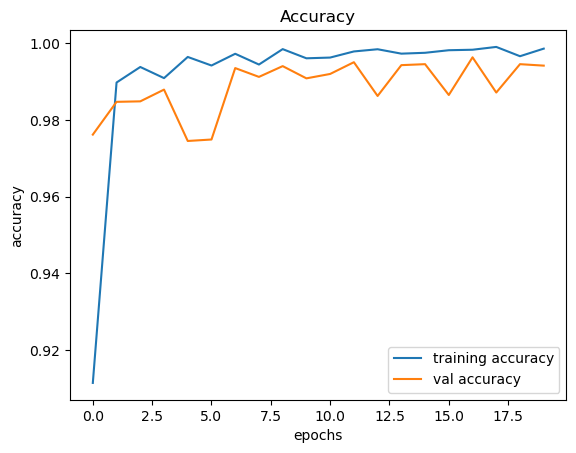

In [35]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(model3_2.history['accuracy'], label='training accuracy')
plt.plot(model3_2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

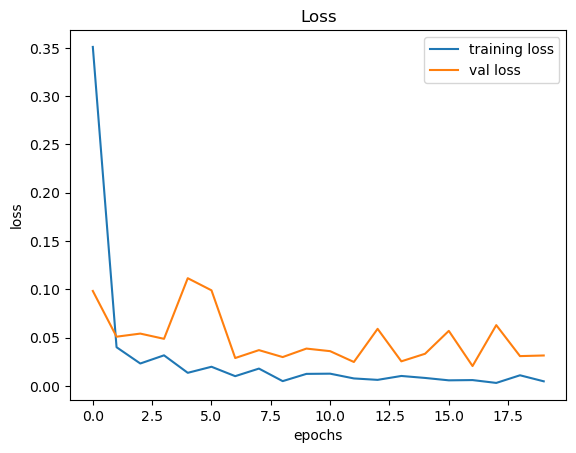

In [36]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(model3_2.history['loss'], label='training loss')
plt.plot(model3_2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

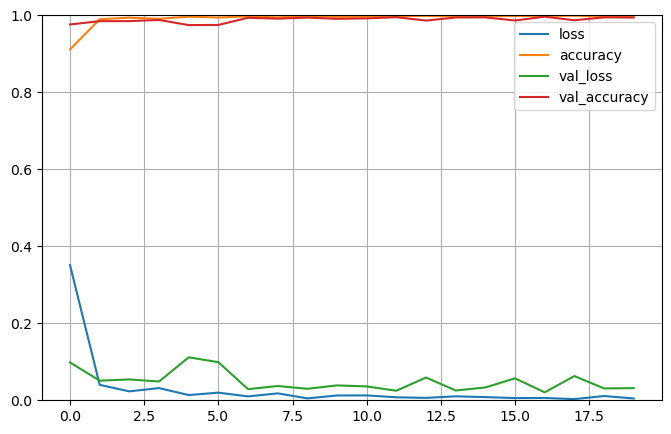

In [37]:
pd.DataFrame(model3_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Test trained model

In [38]:
score_3_2 = cnn3_2.evaluate(X_test, y_test, verbose=0)

print('Test Score:', score_3_2[0])
print('Test Accuracy:', score_3_2[1])

Test Score: 0.17782782018184662
Test Accuracy: 0.9614410400390625


In [39]:
# Save the model
cnn3_2.save('trained_models/grayscale/cnn3_2_' + str(int(score_3_2[1]*100)) + '.h5')

395/395 [==============================] - 8s 19ms/step


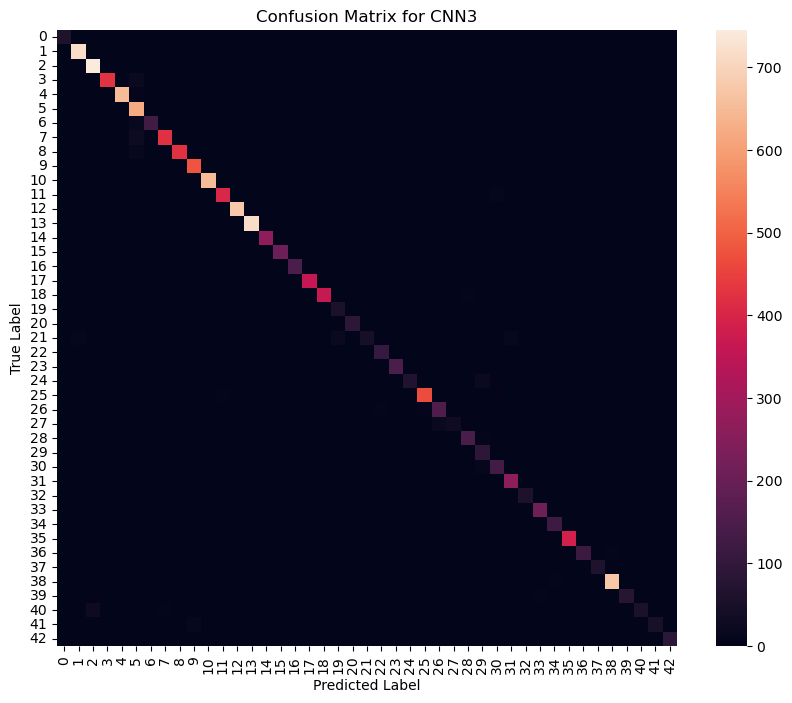

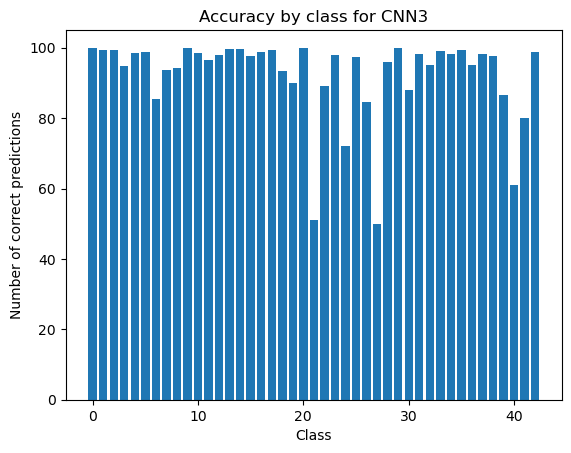

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.96      0.99      0.98       720
           2       0.95      0.99      0.97       750
           3       0.99      0.95      0.97       450
           4       0.99      0.98      0.99       660
           5       0.88      0.99      0.93       630
           6       0.98      0.85      0.91       150
           7       0.97      0.94      0.95       450
           8       0.98      0.94      0.96       450
           9       0.97      1.00      0.99       480
          10       0.99      0.98      0.99       660
          11       0.98      0.96      0.97       420
          12       0.99      0.98      0.98       690
          13       0.99      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       0.99      0.98      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [40]:
# Model3 confusion matrix
y_pred = cnn3_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm_3_2 = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_3_2, annot=False, fmt='d')
plt.title('Confusion Matrix for CNN3')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy by class
diagonal = np.diag(cm_3_2)
# Use the percentage of correct predictions
diagonal = diagonal/cm_3_2.sum(axis=1)*100
plt.bar(range(len(diagonal)), diagonal)
plt.xlabel('Class')
plt.ylabel('Number of correct predictions')
plt.title('Accuracy by class for CNN3')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

In [41]:
# Sum the quantity of correct predictions
correct_predictinons = sum(np.diag(cm_3_2))
# Sum the quantity of incorrect predictions
total_predictions = sum(sum(cm_3_2))

# Accuracy
accuracy = correct_predictinons/total_predictions

# Save wrong predictions into a variable for further analysis
wrong_predictions_3_2 = np.where(y_pred_classes != y_true)[0]



#### CNN with 3 Convolutional Layer using BatchNormalization and Dropdown

In [42]:
def CNN3_3(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # BLOCK 3: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [43]:
# Create the model
cnn3_3 = CNN3_3(X_train.shape[1:])

# Compile model
cnn3_3.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# CNN model summary

cnn3_3.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 36, 36, 1)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 34, 34, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                              

In [45]:
#Train the model
model3_3 = cnn3_3.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/20
981/981 [==============================] - 63s 60ms/step - loss: 0.3523 - accuracy: 0.9127 - val_loss: 0.1102 - val_accuracy: 0.9714
Epoch 2/20
981/981 [==============================] - 59s 60ms/step - loss: 0.0421 - accuracy: 0.9887 - val_loss: 0.0448 - val_accuracy: 0.9874
Epoch 3/20
981/981 [==============================] - 61s 62ms/step - loss: 0.0288 - accuracy: 0.9919 - val_loss: 0.3803 - val_accuracy: 0.9021
Epoch 4/20
981/981 [==============================] - 50s 51ms/step - loss: 0.0232 - accuracy: 0.9932 - val_loss: 0.1017 - val_accuracy: 0.9727
Epoch 5/20
981/981 [==============================] - 47s 48ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.0427 - val_accuracy: 0.9876
Epoch 6/20
981/981 [==============================] - 49s 50ms/step - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.0510 - val_accuracy: 0.9874
Epoch 7/20
981/981 [==============================] - 49s 50ms/step - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.0329 - val_accuracy:

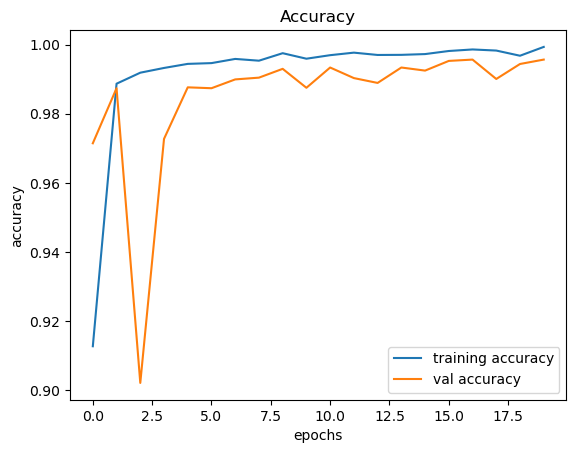

In [46]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(model3_3.history['accuracy'], label='training accuracy')
plt.plot(model3_3.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

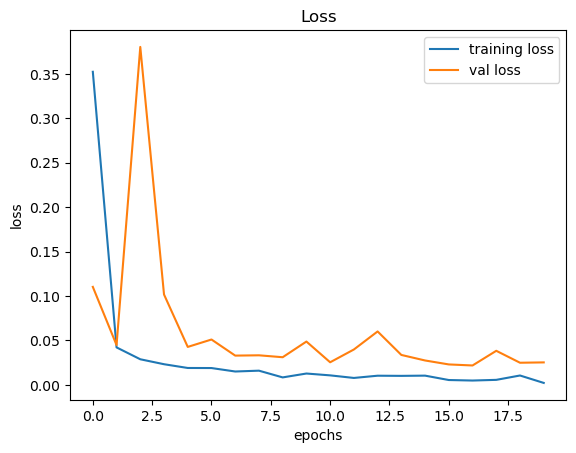

In [47]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(model3_3.history['loss'], label='training loss')
plt.plot(model3_3.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

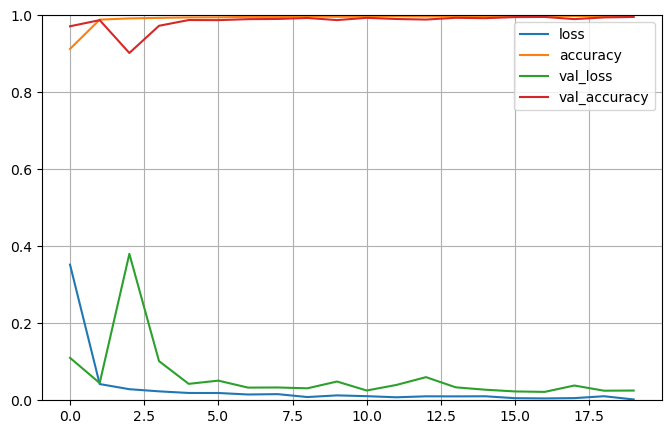

In [48]:
pd.DataFrame(model3_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Test trained model

In [49]:
score_3_3 = cnn3_3.evaluate(X_test, y_test, verbose=0)

print('Test Score:', score_3_3[0])
print('Test Accuracy:', score_3_3[1])

Test Score: 0.13055844604969025
Test Accuracy: 0.9708630442619324


In [50]:
# Save the model
cnn3_3.save('trained_models/grayscale/cnn3_3_' + str(int(score_3_3[1]*100)) + '.h5')

395/395 [==============================] - 6s 15ms/step


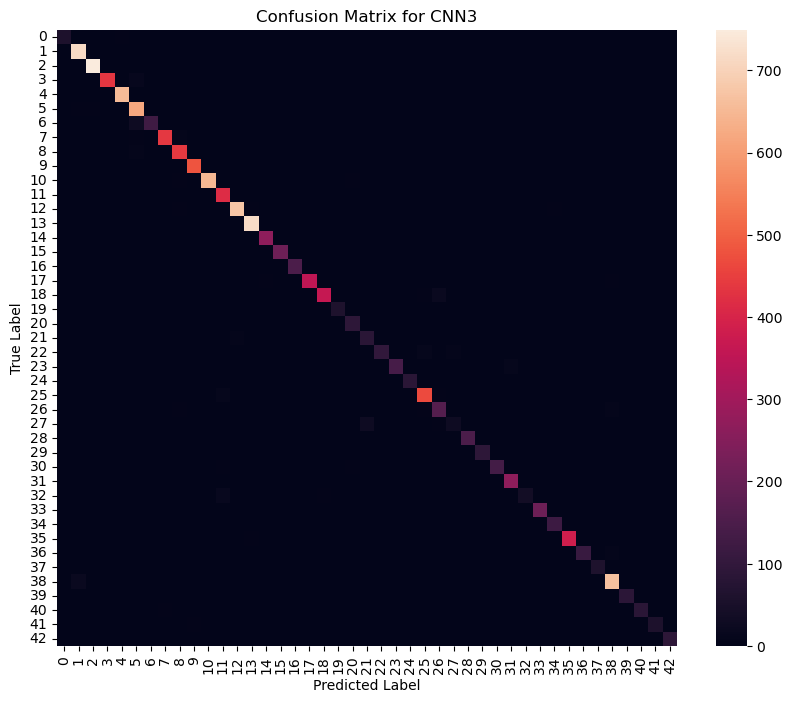

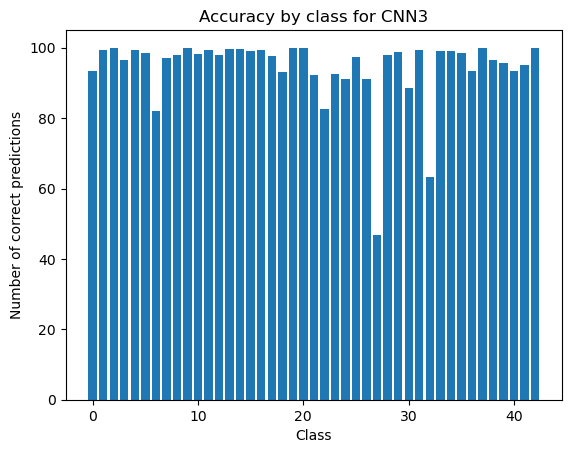

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.96      0.99      0.98       720
           2       0.99      1.00      1.00       750
           3       1.00      0.96      0.98       450
           4       0.98      0.99      0.99       660
           5       0.92      0.98      0.95       630
           6       1.00      0.82      0.90       150
           7       0.99      0.97      0.98       450
           8       0.95      0.98      0.96       450
           9       0.99      1.00      1.00       480
          10       1.00      0.98      0.99       660
          11       0.93      0.99      0.96       420
          12       0.99      0.98      0.98       690
          13       0.98      1.00      0.99       720
          14       0.98      1.00      0.99       270
          15       1.00      0.99      1.00       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [51]:
# Model3 confusion matrix
y_pred = cnn3_3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm_3_3 = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_3_3, annot=False, fmt='d')
plt.title('Confusion Matrix for CNN3')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy by class
diagonal = np.diag(cm_3_3)
# Use the percentage of correct predictions
diagonal = diagonal/cm_3_3.sum(axis=1)*100
plt.bar(range(len(diagonal)), diagonal)
plt.xlabel('Class')
plt.ylabel('Number of correct predictions')
plt.title('Accuracy by class for CNN3')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

In [52]:
# Sum the quantity of correct predictions
correct_predictinons = sum(np.diag(cm_3_3))
# Sum the quantity of incorrect predictions
total_predictions = sum(sum(cm_3_3))

# Accuracy
accuracy = correct_predictinons/total_predictions

# Save wrong predictions into a variable for further analysis
wrong_predictions_3_3 = np.where(y_pred_classes != y_true)[0]



In [53]:
# Compare wrong predictions of each model
print('Wrong predictions for CNN3_1:', len(wrong_predictions_3))
print('Wrong predictions for CNN3_2:', len(wrong_predictions_3_2))
print('Wrong predictions for CNN3_3:', len(wrong_predictions_3_3))

# Print predictions the intersection of the three models
print('Intersection of the three models:', len(set(wrong_predictions_3) & set(wrong_predictions_3_2) & set(wrong_predictions_3_3)))

Wrong predictions for CNN3_1: 280
Wrong predictions for CNN3_2: 487
Wrong predictions for CNN3_3: 368
Intersection of the three models: 127


#### Combination of the 4 alghorithms

In [54]:
x_sample = X_test[0].reshape(1, X_test[0].shape[0], X_test[0].shape[0], X_test[1].shape[2])
y_sample = y_test[0]

x_sample.shape

# Predict the class of the first image of the test set
start = time.time()
predicted1 = cnn1.predict(x_sample)
predicted3 = cnn3.predict(x_sample)
predicted3_2 = cnn3_2.predict(x_sample)
predicted3_3 = cnn3_3.predict(x_sample)

# Sum the probabilities of the three models
predicted_sum = predicted1 + predicted3 + predicted3_2 + predicted3_3

print("Time taken:", time.time() - start)

# Print the predicted class
print("Class with the highest probability:", np.argmax(predicted_sum))

# Print the real class
print("Real class:", np.argmax(y_sample))

1/1 [==============================] - 0s 44ms/step
Time taken: 0.4953305721282959
Class with the highest probability: 16
Real class: 16


In [55]:
# The same as before but using the full test set
predicted1 = cnn1.predict(X_test)
predicted3 = cnn3.predict(X_test)
predicted3_2 = cnn3_2.predict(X_test)
predicted3_3 = cnn3_3.predict(X_test)

# Sum the probabilities of the three models
predicted_sum = predicted1 + predicted3 + predicted3_2 + predicted3_3

# Compare the predicted class with the real class
predicted_classes = np.argmax(predicted_sum, axis = 1)
real_classes = np.argmax(y_test, axis = 1)

# Print the accuracy
print("Accuracy:", sum(predicted_classes == real_classes)/len(real_classes))


395/395 [==============================] - 6s 16ms/step
Accuracy: 0.9810768012668251


#### Combination of 2 best algorithms

In [56]:
x_sample = X_test[0].reshape(1, X_test[0].shape[0], X_test[0].shape[0], X_test[1].shape[2])
y_sample = y_test[0]

x_sample.shape

# Predict the class of the first image of the test set
start = time.time()
predicted3 = cnn3.predict(x_sample)
predicted3_2 = cnn3_2.predict(x_sample)

# Sum the probabilities of the three models
predicted_sum = predicted3 + predicted3_2

print("Time taken:", time.time() - start)

# Print the predicted class
print("Class with the highest probability:", np.argmax(predicted_sum))

# Print the real class
print("Real class:", np.argmax(y_sample))

1/1 [==============================] - 0s 36ms/step
Time taken: 0.22135472297668457
Class with the highest probability: 16
Real class: 16


In [57]:
# The same as before but using the full test set
predicted3 = cnn3.predict(X_test)
predicted3_2 = cnn3_3.predict(X_test)

# Sum the probabilities of the three models
predicted_sum = predicted3 + predicted3_2

# Compare the predicted class with the real class
predicted_classes = np.argmax(predicted_sum, axis = 1)
real_classes = np.argmax(y_test, axis = 1)

# Print the accuracy
print("Accuracy:", sum(predicted_classes == real_classes)/len(real_classes))


395/395 [==============================] - 6s 16ms/step
Accuracy: 0.9795724465558194


#### CNN with 4 Convolutional Layer using BatchNormalization and Dropdown

In [58]:
def CNN4_1(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization()(X)

    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.25)(X)

    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv3')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    X = Flatten()(X)

    X = Dense(512, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.5)(X)

    X = Dense(256, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.5)(X)

    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [59]:
# Create the model
cnn4_1 = CNN4_1(X_train.shape[1:])

# Compile model
cnn4_1.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# CNN model summary

cnn4_1.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 zero_padding2d_4 (ZeroPaddi  (None, 36, 36, 1)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 34, 34, 32)       128       
 hNormalization)                                                 
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128    

In [61]:
#Train the model
model4_1 = cnn4_1.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/20
981/981 [==============================] - 138s 135ms/step - loss: 0.9253 - accuracy: 0.7597 - val_loss: 0.0742 - val_accuracy: 0.9819
Epoch 2/20
981/981 [==============================] - 134s 137ms/step - loss: 0.1469 - accuracy: 0.9596 - val_loss: 0.0520 - val_accuracy: 0.9861
Epoch 3/20
981/981 [==============================] - 134s 137ms/step - loss: 0.0936 - accuracy: 0.9734 - val_loss: 0.0241 - val_accuracy: 0.9936
Epoch 4/20
981/981 [==============================] - 134s 136ms/step - loss: 0.0944 - accuracy: 0.9733 - val_loss: 0.0339 - val_accuracy: 0.9916
Epoch 5/20
981/981 [==============================] - 134s 137ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0365 - val_accuracy: 0.9930
Epoch 6/20
981/981 [==============================] - 139s 142ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0340 - val_accuracy: 0.9929
Epoch 7/20
981/981 [==============================] - 140s 142ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0267 -

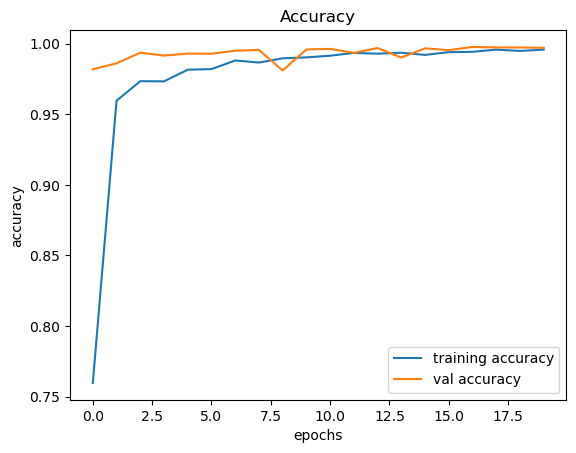

In [62]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(model4_1.history['accuracy'], label='training accuracy')
plt.plot(model4_1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

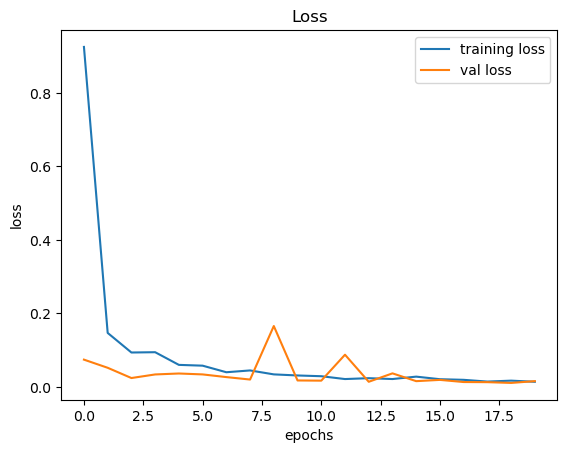

In [63]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(model4_1.history['loss'], label='training loss')
plt.plot(model4_1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

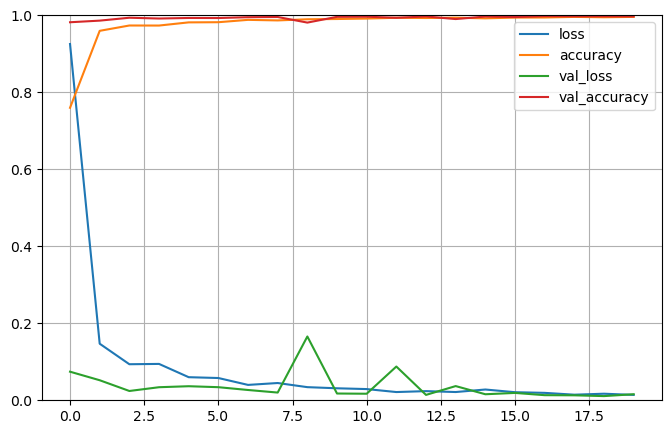

In [64]:
pd.DataFrame(model4_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##### Test trained model

In [65]:
score_4_1 = cnn4_1.evaluate(X_test, y_test, verbose=0)

print('Test Score:', score_4_1[0])
print('Test Accuracy:', score_4_1[1])

Test Score: 0.08393482863903046
Test Accuracy: 0.9842438697814941


In [66]:
# Save the model
cnn4_1.save('trained_models/grayscale/cnn4_1_' + str(int(score_4_1[1]*100)) + '.h5')

395/395 [==============================] - 13s 32ms/step


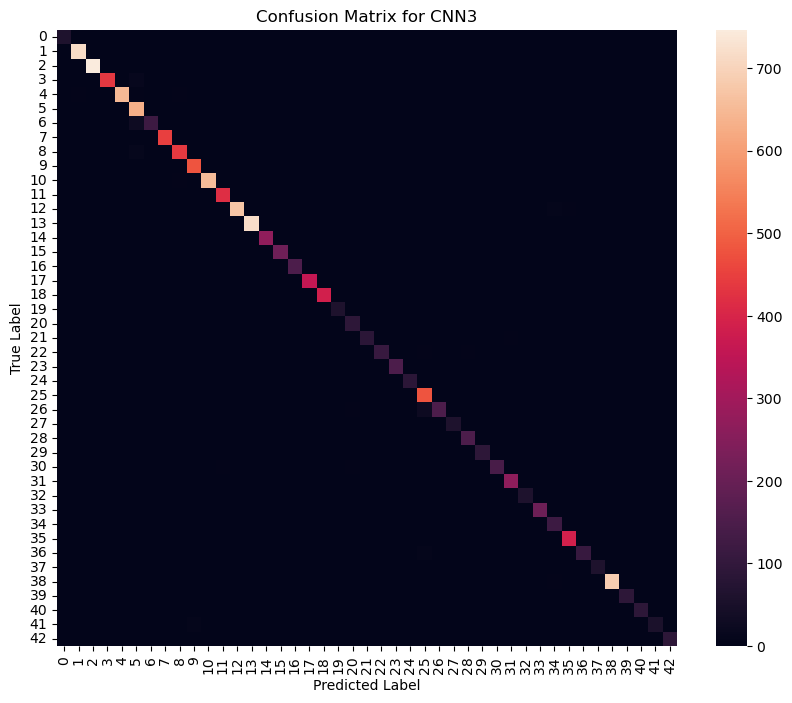

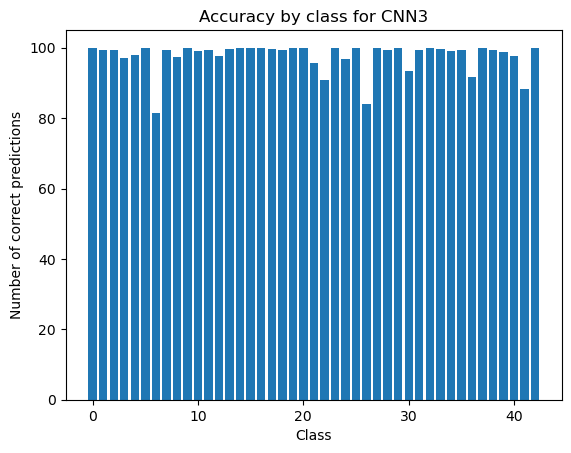

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99       720
           2       0.99      0.99      0.99       750
           3       0.99      0.97      0.98       450
           4       1.00      0.98      0.99       660
           5       0.92      1.00      0.96       630
           6       1.00      0.81      0.90       150
           7       1.00      0.99      0.99       450
           8       0.97      0.97      0.97       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.99      0.99      0.99       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       0.99      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [67]:
# Model3 confusion matrix
y_pred = cnn4_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm_4_1 = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_4_1, annot=False, fmt='d')
plt.title('Confusion Matrix for CNN3')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Accuracy by class
diagonal = np.diag(cm_4_1)
# Use the percentage of correct predictions
diagonal = diagonal/cm_4_1.sum(axis=1)*100
plt.bar(range(len(diagonal)), diagonal)
plt.xlabel('Class')
plt.ylabel('Number of correct predictions')
plt.title('Accuracy by class for CNN3')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

In [68]:
# Sum the quantity of correct predictions
correct_predictinons = sum(np.diag(cm_4_1))
# Sum the quantity of incorrect predictions
total_predictions = sum(sum(cm_4_1))

# Accuracy
accuracy = correct_predictinons/total_predictions

# Save wrong predictions into a variable for further analysis
wrong_predictions_4_1 = np.where(y_pred_classes != y_true)[0]



##### Joining the best two models

In [69]:
# The same as before but using the full test set
predicted3 = cnn3.predict(X_test)
predicted4_1 = cnn4_1.predict(X_test)

# Sum the probabilities of the three models
predicted_sum = predicted3 + predicted4_1

# Compare the predicted class with the real class
predicted_classes = np.argmax(predicted_sum, axis = 1)
real_classes = np.argmax(y_test, axis = 1)

# Print the accuracy
print("Accuracy:", sum(predicted_classes == real_classes)/len(real_classes))


395/395 [==============================] - 12s 30ms/step
Accuracy: 0.9865399841646872
